In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import glob
from scipy.optimize import curve_fit

In [21]:
# FIX THE LOGSAT FUNCTION (...IN THE IF COND)
# FIT THE FULL HOD

def LOGSAT(log_Mh, log_Mcut, log_M1, alpha):    
    if log_Mh[0] < log_Mcut:
        arr = alpha * (np.log10(10.**log_Mh[1:] - 10.**log_Mcut) - log_M1)
        return np.concatenate(([-1.5], arr))
        
    else:
        return alpha * (np.log10(10.**log_Mh - 10.**log_Mcut) - log_M1)

def LOGCEN(log_Mh, log_Mmin, sigma):
    erf = sc.special.erf((log_Mh - log_Mmin)/sigma)
    return np.log10(0.5 * (1 + erf))

def Adjust (X_axis, Cen, Sat):

    log_Mh = X_axis
    mask_cen = Cen > -1
    mask_sat = Sat > -1

    x0_mcut = log_Mh[mask_sat][0] - 0.1
    x0_cen = np.array([11.2, 0.5])
    x0_sat = np.array([x0_mcut, 13.2, 1.3])

    popt_cen, pcov_cen = curve_fit(LOGCEN, log_Mh[mask_cen], Cen[mask_cen], x0_cen)
    popt_sat, pcov_sat = curve_fit(LOGSAT, log_Mh[mask_sat], Sat[mask_sat], x0_sat)

    perr_cen = np.sqrt(np.diag(pcov_cen))
    perr_sat = np.sqrt(np.diag(pcov_sat))
    
    par_cen = np.array([popt_cen, perr_cen]).T
    par_sat = np.array([popt_sat, perr_sat]).T
    
    return par_cen, par_sat
    

In [22]:
log_Mh,Cen,Sat, par_cen, par_sat = Adjust('plots/hod_d1_30b')

/home/esteban/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


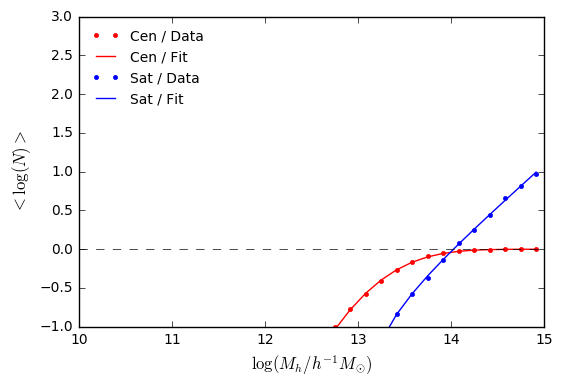

In [28]:
f = plt.figure()
plt.plot(log_Mh, Cen, 'r.', label = 'Cen / Data')
plt.plot(log_Mh[log_Mh > -2], LOGCEN(log_Mh[log_Mh > -2], *par_cen[:,0]), 'r-', label = 'Cen / Fit')
plt.plot(log_Mh, Sat, 'b.', label='Sat / Data')
plt.plot(log_Mh[log_Mh > -2], LOGSAT(log_Mh[log_Mh > -2], *par_sat[:,0]), 'b-', label='Sat / Fit')
plt.axhline(y=0, color = 'black', ls = '--', lw= .5)
plt.ylim(-1,3)
plt.xlim(10,15)
plt.ylabel(r"$<\log(N)>$",fontsize = 12)
plt.xlabel(r"$\log(M_h/h^{-1}M_{\odot})$", fontsize = 12)
plt.legend(frameon= False, loc = 'upper left', prop={'size':10})
f.savefig('asdasd.pdf' )
plt.show()


In [9]:
hods_arr = np.array(glob.glob('plots/hod*'))
ll = []
for hod in hods_arr:
    idx = int(hod[5])
    ll.append(idx-1)
ll_arr = np.argsort(np.array(ll))
hods_arr = hods_arr[ll_arr]

ValueError: invalid literal for int() with base 10: '/'

In [ ]:
for hod in hods_arr:

    bins, Full, Cen, Sat = np.loadtxt(hod, unpack = True)

    log_Mh = bins
    mask_cen = Cen > -1
    mask_sat = Sat > -1

    x0_mcut = log_Mh[mask_sat][0] - 0.1
    x0_cen = np.array([11.2, 0.5])
    x0_sat = np.array([x0_mcut, 13.2, 1.3])

    popt_cen, pcov_cen = curve_fit(LOGCEN, log_Mh[mask_cen], Cen[mask_cen], x0_cen)
    popt_sat, pcov_sat = curve_fit(LOGSAT, log_Mh[mask_sat], Sat[mask_sat], x0_sat)

    perr_cen = np.sqrt(np.diag(pcov_cen))
    perr_sat = np.sqrt(np.diag(pcov_sat))

    f = plt.figure()
    plt.plot(log_Mh, Cen, 'r.', label = 'Cen / Data')
    plt.plot(log_Mh[log_Mh > -2], LOGCEN(log_Mh[log_Mh > -2], *popt_cen), 'r-', label = 'Cen / Fit')
    plt.plot(log_Mh, Sat, 'b.', label='Sat / Data')
    plt.plot(log_Mh[log_Mh > -2], LOGSAT(log_Mh[log_Mh > -2], *popt_sat), 'b-', label='Sat / Fit')
    plt.axhline(y=0, color = 'black', ls = '--', lw= .5)
    plt.ylim(-1,3)
    plt.xlim(10,15)
    plt.ylabel(r"$<\log(N)>$",fontsize = 12)
    plt.xlabel(r"$\log(M_h/h^{-1}M_{\odot})$", fontsize = 12)
    plt.legend(frameon= False, loc = 'upper left', prop={'size':10})
    f.savefig('%s.pdf' %hod)


In [ ]:
data = np.load('Data_bin/HOD_SN25_0p01_SFR_Age.npy')
X = np.load('Data_bin/X_axis.npy')

In [ ]:
ALL = data[0][0]
CEN = data[0][1]
SAT = data[0][2]

plt.plot(X, ALL, 'k.')
plt.plot(X, CEN, 'r--')
plt.plot(X, SAT, 'b--')
plt.yscale('log')
plt.ylim(1e-1, 1e2)
plt.xlim(10,15)
plt.show()